<a href="https://colab.research.google.com/github/agushery/DataVisualization-COVID19/blob/master/Data_Visualization_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

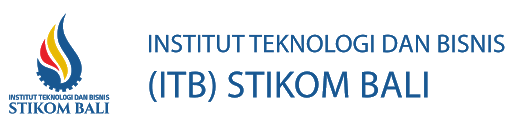

# **Data Visualization Covid-19**
* **Nama : Agus Hery Setiawan**
* **Data Source-COVID-19 : https://github.com/CSSEGISandData**
* **Data Source Population : https://www.worldpopulationreview.com**

## **Prepare library and Load Dataset**

### **Import Library**

In [1]:
# for load dataset
import pandas as pd

# for processing quartil
import numpy as np

# for prepocessing data (StandardScaler)
from sklearn import preprocessing

# for K-Means
from sklearn.cluster import KMeans

# for visual
import matplotlib.pyplot as plt
from matplotlib import style
plt.rcParams['figure.figsize'] = 20,8
style.use('ggplot')
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import download_plotlyjs,init_notebook_mode, plot, iplot
plt.rcParams['figure.figsize'] = 20,8
import cufflinks as cf
cf.go_offline()

import seaborn as sns
sns.set_style('whitegrid')

print('Setup Complete')


Setup Complete


### **Load Dataset Covid from source**

In [2]:
# save url to variabel
url_confirm = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url_death = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
url_recovery = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

# load dataset with pandas
confirm_data = pd.read_csv(url_confirm)
death_data = pd.read_csv(url_death)
recovery_data = pd.read_csv(url_recovery)

print('Load Dataset Complete')

Load Dataset Complete


### **Load Dataset Population**

In [3]:
population_data = pd.read_csv('Data/population.csv')
print('Load Dataset Complete')

Load Dataset Complete


### **Check Shape and Info of Dataset**

SHAPE

In [4]:
print('confirm_data : ', confirm_data.shape)
print('death_data : ', death_data.shape)
print('recovery_data : ', recovery_data.shape)
print('Population_data : ', population_data.shape)

confirm_data :  (276, 500)
death_data :  (276, 500)
recovery_data :  (261, 500)
Population_data :  (232, 18)


INFO

In [5]:
print('confirm_data : ', confirm_data.info())
print('death_data : ', death_data.info())
print('recovery_data : ', recovery_data.info())
print('population_data : ', population_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Columns: 500 entries, Province/State to 5/31/21
dtypes: float64(2), int64(496), object(2)
memory usage: 1.1+ MB
confirm_data :  None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Columns: 500 entries, Province/State to 5/31/21
dtypes: float64(2), int64(496), object(2)
memory usage: 1.1+ MB
death_data :  None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Columns: 500 entries, Province/State to 5/31/21
dtypes: float64(2), int64(496), object(2)
memory usage: 1019.7+ KB
recovery_data :  None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cca2             231 non-null    object 
 1   name             232 non-null    object 
 2   pop2021          232 non-null    int64  
 3   pop2020          232 non-null    int64  
 4

## **Preprocessing Data**

### **Melt Data**

In [6]:
# Confirmed
confirm_data = confirm_data.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
    var_name='Time',
    value_name='Confirmed'
)

# Death
death_data = death_data.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
    var_name='Time',
    value_name='Deaths'
)

# Recovery
recovery_data = recovery_data.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
    var_name='Time',
    value_name='Recovered'
)

### **Merge Dataset COVID-19**

**Grouped Data  with same Country/Region and Time**

In [7]:
# Confirmed Data
confirm_data = confirm_data.groupby(['Country/Region', 'Time'])['Confirmed'].sum()
confirm_data = confirm_data.to_frame().reset_index()

# Deaths Data
death_data = death_data.groupby(['Country/Region', 'Time'])['Deaths'].sum()
death_data = death_data.to_frame().reset_index()

# Recovery Data
recovery_data = recovery_data.groupby(['Country/Region', 'Time'])['Recovered'].sum()
recovery_data = recovery_data.to_frame().reset_index()

**Rename Columns and Pick Columns Coutry/Region, Population of Population dataset**

In [8]:
population_data.rename(columns={'name' : 'Country/Region', 'pop2020' : 'Population'}, inplace = True)
population_data = population_data[['Country/Region','Population']]

**MERGE DATASET COVID-19**

In [9]:
data = confirm_data.merge(death_data, how='inner')
data = data.merge(recovery_data, how='inner')

**Add Active Column**

In [10]:
data['Active'] = data['Confirmed'] - data['Deaths'] - data['Recovered']
data.head()

,Country/Region,Time,Confirmed,Deaths,Recovered,Active
0,Afghanistan,1/1/21,51526,2191,41727,7608
1,Afghanistan,1/10/21,53489,2277,43948,7264
2,Afghanistan,1/11/21,53538,2288,44137,7113
3,Afghanistan,1/12/21,53584,2301,44608,6675
4,Afghanistan,1/13/21,53584,2301,44850,6433


**Grouped Time Column**

In [11]:
# sort data with groupped time
data['Time'] = pd.to_datetime(data['Time'])
dataGroup = data.groupby('Time')[["Confirmed","Deaths","Recovered","Active"]].sum()
dataGroup.head()

,Confirmed,Deaths,Recovered,Active
Time,,,,
2020-01-22,557,17,30,510
2020-01-23,655,18,32,605
2020-01-24,941,26,39,876
2020-01-25,1433,42,42,1349
2020-01-26,2118,56,56,2006


**Initiation last day of data**

In [12]:
recent_date = data['Time'].max()
last_day = data[data['Time'] == recent_date]
last_day.head()

,Country/Region,Time,Confirmed,Deaths,Recovered,Active
361,Afghanistan,2021-05-31,71838,2944,57629,11265
857,Albania,2021-05-31,132315,2451,129431,433
1353,Algeria,2021-05-31,128913,3472,89839,35602
1849,Andorra,2021-05-31,13727,127,13458,142
2345,Angola,2021-05-31,34551,766,28079,5706


**MERGE DATA Last Day With Population**

In [13]:
final_data = pd.merge(last_day, population_data)
final_data.head()

,Country/Region,Time,Confirmed,Deaths,Recovered,Active,Population
0,Afghanistan,2021-05-31,71838,2944,57629,11265,38928346
1,Albania,2021-05-31,132315,2451,129431,433,2877797
2,Algeria,2021-05-31,128913,3472,89839,35602,43851044
3,Andorra,2021-05-31,13727,127,13458,142,77265
4,Angola,2021-05-31,34551,766,28079,5706,32866272


**Check Missing Values**

In [14]:
def draw_missing_data_table(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
draw_missing_data_table(final_data)

,Total,Percent
Country/Region,0,0.0
Time,0,0.0
Confirmed,0,0.0
Deaths,0,0.0
Recovered,0,0.0
Active,0,0.0
Population,0,0.0


**Comparison of the number of deaths and active cases to the population of each country**

In [15]:
final_data['%Confirmed'] = final_data['Confirmed'].div(final_data['Population'])
final_data['%Deaths'] = final_data['Deaths'].div(final_data['Population'])
final_data['%Active'] = final_data['Active'].div(final_data['Population'])
final_data.head()

,Country/Region,Time,Confirmed,Deaths,Recovered,Active,Population,%Confirmed,%Deaths,%Active
0,Afghanistan,2021-05-31,71838,2944,57629,11265,38928346,0.001845,0.000076,0.000289
1,Albania,2021-05-31,132315,2451,129431,433,2877797,0.045978,0.000852,0.000150
2,Algeria,2021-05-31,128913,3472,89839,35602,43851044,0.002940,0.000079,0.000812
3,Andorra,2021-05-31,13727,127,13458,142,77265,0.177661,0.001644,0.001838
4,Angola,2021-05-31,34551,766,28079,5706,32866272,0.001051,0.000023,0.000174


**Create Quartil**

In [16]:
q1_confirmed = np.quantile(final_data['%Confirmed'],0.25)
q2_confirmed = np.quantile(final_data['%Confirmed'],0.50)
q1_deaths = np.quantile(final_data['%Deaths'],0.25)
q2_deaths = np.quantile(final_data['%Deaths'],0.50)
q1_active = np.quantile(final_data['%Active'],0.25)
q2_active = np.quantile(final_data['%Active'],0.50)

### **Category Country by Quartil**

In [17]:
cukupRawan = final_data[(final_data['%Deaths'] <= q1_deaths) & (final_data['%Active'] <= q1_active)]
rawan = final_data[(((final_data['%Deaths'] > q1_deaths) & (final_data['%Deaths'] <= q2_deaths)) & ((final_data['Active'] > q1_active) & (final_data['%Active'] <= q2_active)))]
sangatRawan = final_data[(final_data['%Deaths'] > q2_deaths) | (final_data['%Active'] > q2_active)]

## **VISUALIZATION DATA**

### **Bar plot Top 10 Case**

In [18]:
df_countries_case = final_data.copy()
df_countries_case.index = df_countries_case["Country/Region"]
df_countries_case = df_countries_case.drop(['Country/Region'],axis=1)

In [19]:
def topcase(tipe, warna):
    plt.axes(axisbelow=True)
    plt.barh(
        df_countries_case.sort_values(tipe)[tipe].index[-10:],
        df_countries_case.sort_values(tipe)[tipe].values[-10:],
        color=warna)
    plt.tick_params(size=5,labelsize = 13)
    plt.xlabel(tipe + " Cases",fontsize=18)
    plt.title("Top 10 Countries ( " + tipe +" Cases)",fontsize=20)

    plt.grid(alpha=0.3)
    plt.show()

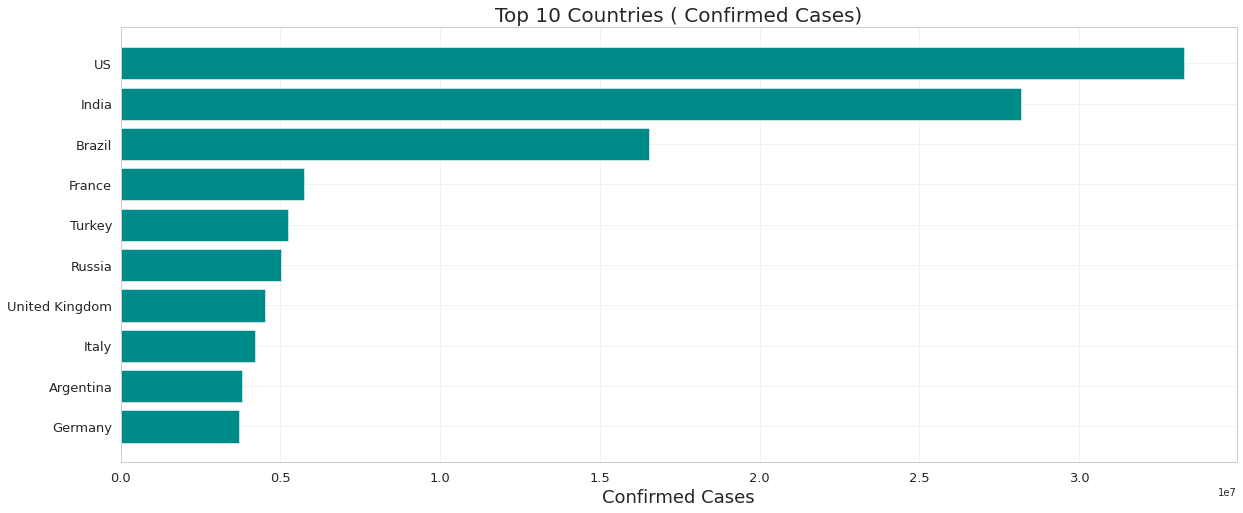

In [20]:
topcase('Confirmed','darkcyan')

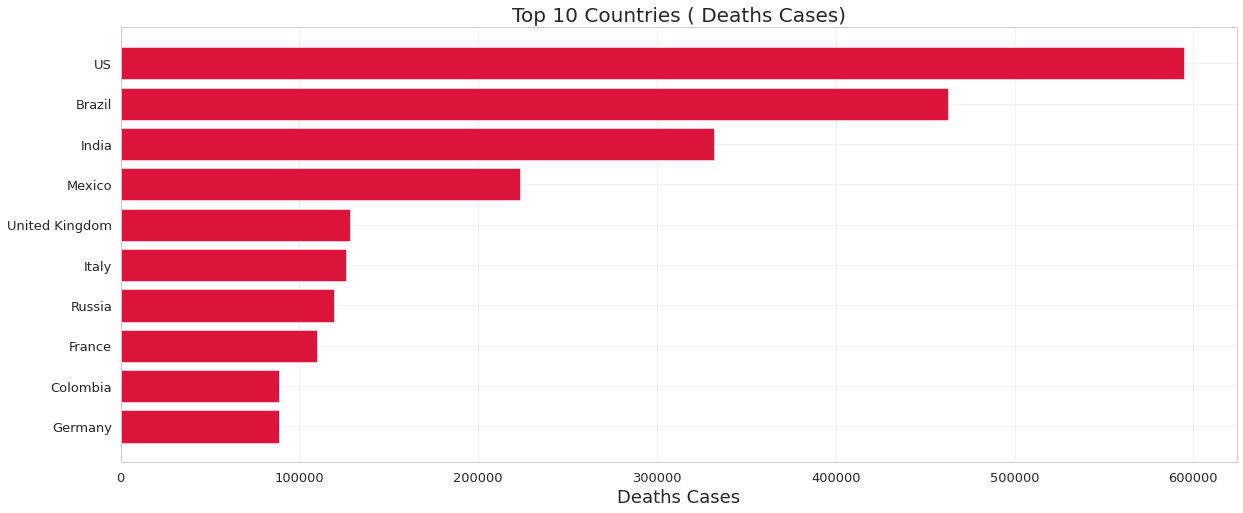

In [21]:
topcase('Deaths', 'crimson')

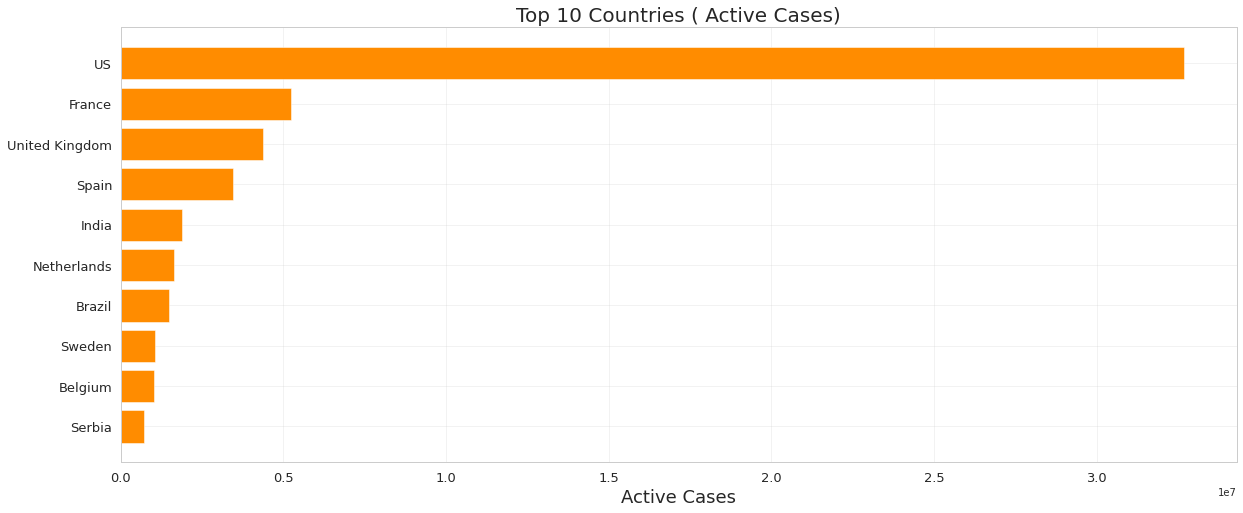

In [22]:
topcase('Active', 'darkorange')

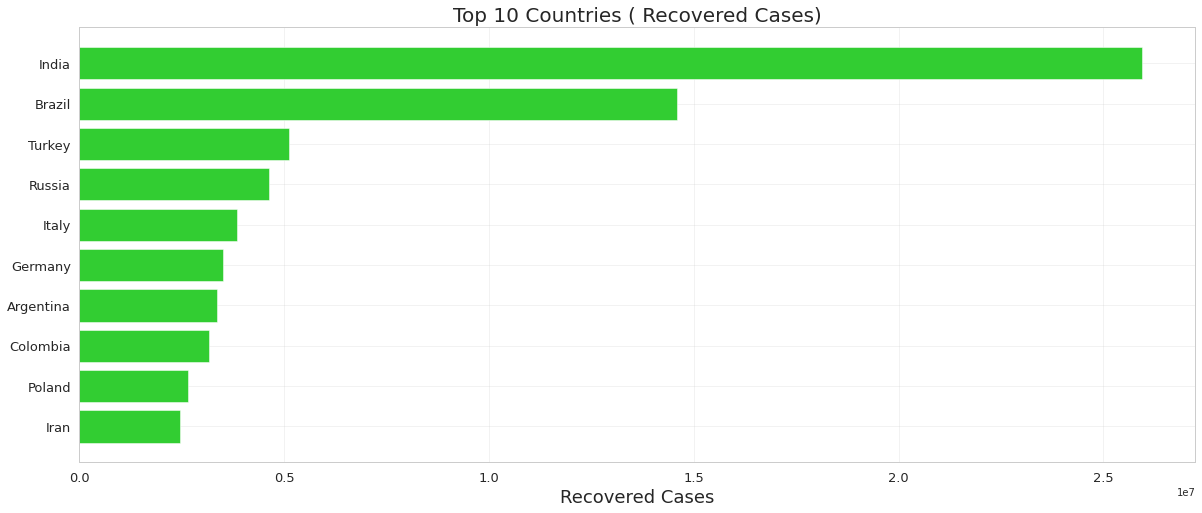

In [23]:
topcase('Recovered', 'limegreen')

### **Pie Plot Top 10 Cases**

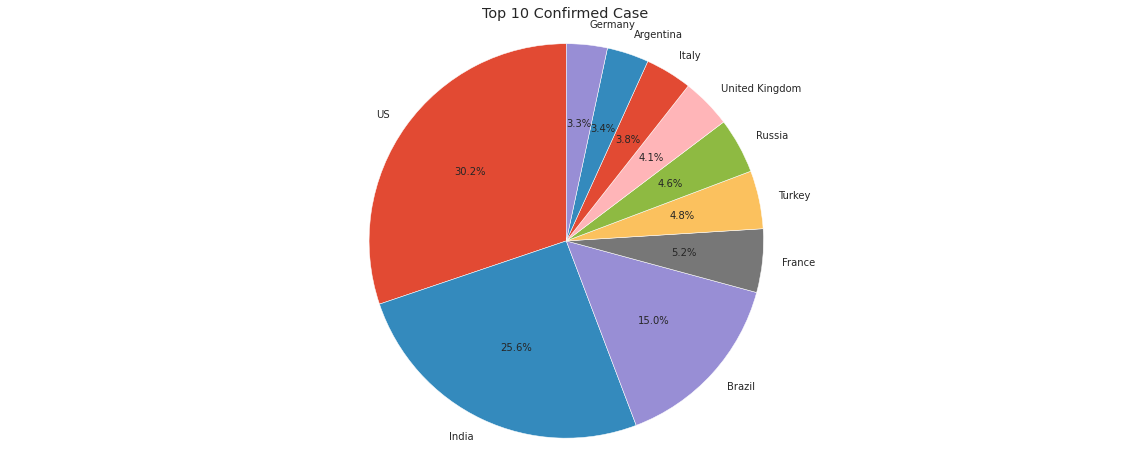

In [24]:
sortConfirmed= final_data.nlargest(10, "Confirmed")
sortConfirmed.sort_values(by = "Confirmed", ascending = False, inplace = True)
fig1, ax1 = plt.subplots()
ax1.pie(
    sortConfirmed['Confirmed'],
    labels=sortConfirmed['Country/Region'],
    autopct='%1.1f%%',
    startangle=90)
ax1.axis('equal')
plt.title('Top 10 Confirmed Case')
plt.show()

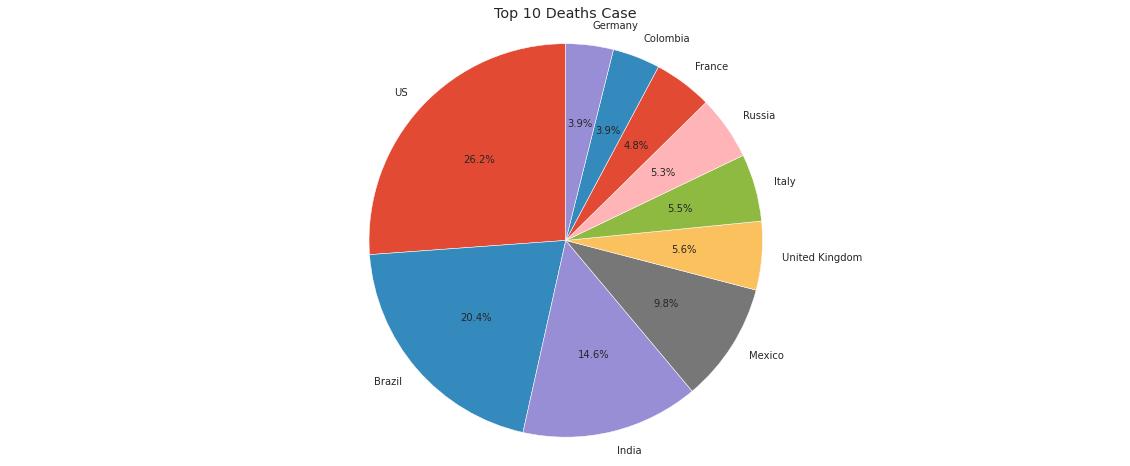

In [25]:
sortDeaths= final_data.nlargest(10, "Deaths")
sortDeaths.sort_values(by = "Deaths", ascending = False, inplace = True)
fig1, ax1 = plt.subplots()
ax1.pie(
    sortDeaths['Deaths'],
    labels=sortDeaths['Country/Region'],
    autopct='%1.1f%%',
    startangle=90)
ax1.axis('equal')
plt.title('Top 10 Deaths Case')
plt.show()

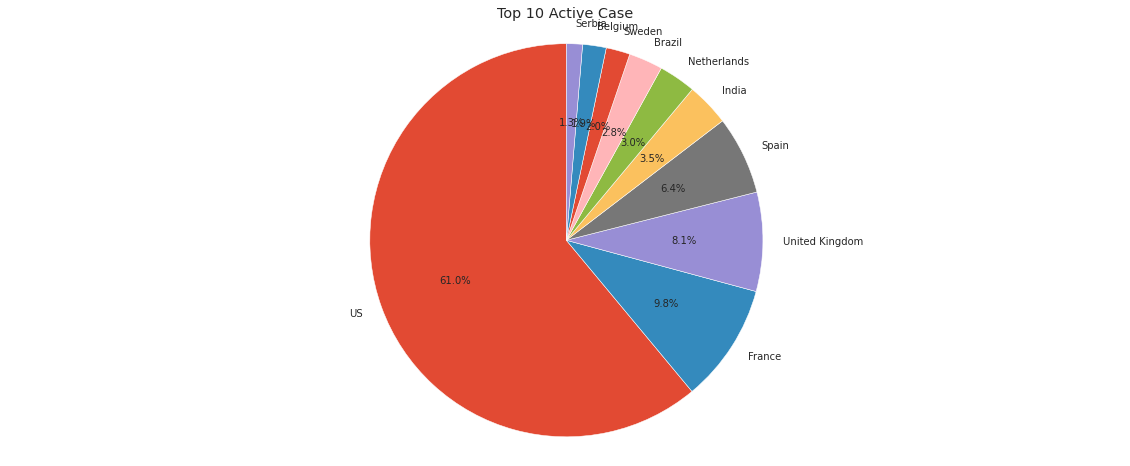

In [26]:
sortActive= final_data.nlargest(10, "Active")
sortActive.sort_values(by = "Active", ascending = False, inplace = True)
fig1, ax1 = plt.subplots()
ax1.pie(
    sortActive['Active'],
    labels=sortActive['Country/Region'],
    autopct='%1.1f%%',
    startangle=90)
ax1.axis('equal')
plt.title('Top 10 Active Case')
plt.show()

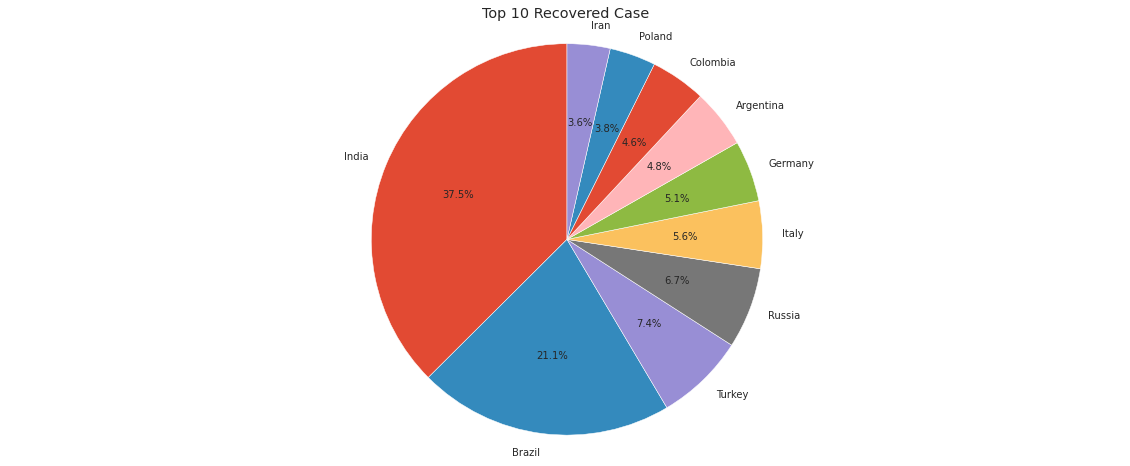

In [27]:
sortRecovered= final_data.nlargest(10, "Recovered")
sortRecovered.sort_values(by = "Recovered", ascending = False, inplace = True)
fig1, ax1 = plt.subplots()
ax1.pie(
    sortRecovered['Recovered'],
    labels=sortRecovered['Country/Region'],
    autopct='%1.1f%%',
    startangle=90)
ax1.axis('equal')
plt.title('Top 10 Recovered Case')
plt.show()

### **Trend Confirmed Case**

In [28]:
dataGroup.iplot(kind = "bar", y = "Confirmed", title = "Tren Confirmed Case Global",xTitle = "Time", yTitle = 'Confimred Cases')

### **Trend Deaths Case**

In [29]:
dataGroup.iplot(kind = "bar", y = "Deaths", title = "Tren Confirmed Case Global",xTitle = "Time", yTitle = 'Confimred Cases')

### **Trend Active Cases**

In [30]:
dataGroup.iplot(kind = "bar", y = "Active", title = "Tren Confirmed Case Global",xTitle = "Time", yTitle = 'Confimred Cases')

### **Trend Recovered Case**

In [31]:
dataGroup.iplot(kind = "bar", y = "Recovered", title = "Tren Confirmed Case Global",xTitle = "Time", yTitle = 'Confimred Cases')

### **Comparison Trend Confirmed, Deaths, Recovered, and Active Case**

In [32]:
dataGroup.iplot(title = "Trend Kasus COVID-19 Secara Global", xTitle = "Time", yTitle = "Amount")

### **Maping Categories Country**

**function for maping**

In [33]:
def maping(data_map, location, color, hover_name, title, colbar):
    fig = px.choropleth(data, locations=location,
                    color=color,locationmode='country names', 
                    hover_name=hover_name, 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    template ='plotly_white')
    fig.update_layout(title_text=title)
    fig.update_coloraxes(colorbar_title=colbar)
    fig.show()

**Quite Vulnerable**

In [34]:
maping(last_day, cukupRawan['Country/Region'], cukupRawan['Confirmed'], cukupRawan['Country/Region'], 'Quite Vulnerable', 'Number of Confirmed')

In [35]:
cukupRawan.style.background_gradient(cmap = "Reds")

,Country/Region,Time,Confirmed,Deaths,Recovered,Active,Population,%Confirmed,%Deaths,%Active
24,Brunei,2021-05-31 00:00:00,242,3,228,11,437479,0.000553,0.000007,0.000025
26,Burkina Faso,2021-05-31 00:00:00,13434,166,13255,13,20903273,0.000643,0.000008,0.000001
32,Central African Republic,2021-05-31 00:00:00,7091,98,6859,134,4829767,0.001468,0.000020,0.000028
33,Chad,2021-05-31 00:00:00,4931,173,4746,12,16425864,0.000300,0.000011,0.000001
35,China,2021-05-31 00:00:00,103014,4846,97770,398,1439323776,0.000072,0.000003,0.000000
39,Congo (Kinshasa),2021-05-31 00:00:00,31651,782,27665,3204,89561403,0.000353,0.000009,0.000036
47,Dominica,2021-05-31 00:00:00,188,0,186,2,71986,0.002612,0.000000,0.000028
53,Eritrea,2021-05-31 00:00:00,4094,14,3853,227,3546421,0.001154,0.000004,0.000064
65,Grenada,2021-05-31 00:00:00,161,1,160,0,112523,0.001431,0.000009,0.000000
71,Holy See,2021-05-31 00:00:00,27,0,27,0,801,0.033708,0.000000,0.000000


**Vulnerable Country**

In [36]:
maping(last_day, rawan['Country/Region'], rawan['Confirmed'], rawan['Country/Region'], 'Vulnerable Country', 'Number of Confirmed')

In [37]:
rawan.style.background_gradient(cmap = "Reds")

,Country/Region,Time,Confirmed,Deaths,Recovered,Active,Population,%Confirmed,%Deaths,%Active
0,Afghanistan,2021-05-31 00:00:00,71838,2944,57629,11265,38928346,0.001845,0.000076,0.000289
8,Australia,2021-05-31 00:00:00,30118,910,23583,5625,25499884,0.001181,0.000036,0.000221
13,Bangladesh,2021-05-31 00:00:00,800540,12619,740372,47549,164689383,0.004861,0.000077,0.000289
14,Barbados,2021-05-31 00:00:00,4017,47,3922,48,287375,0.013978,0.000164,0.000167
15,Belarus,2021-05-31 00:00:00,394439,2851,385382,6206,9449323,0.041743,0.000302,0.000657
37,Comoros,2021-05-31 00:00:00,3881,146,3719,16,869601,0.004463,0.000168,0.000018
42,Cuba,2021-05-31 00:00:00,142266,958,135216,6092,11326616,0.012560,0.000085,0.000538
50,Egypt,2021-05-31 00:00:00,262650,15096,192112,55442,102334404,0.002567,0.000148,0.000542
52,Equatorial Guinea,2021-05-31 00:00:00,8529,118,8146,265,1402985,0.006079,0.000084,0.000189
55,Ethiopia,2021-05-31 00:00:00,271541,4165,238734,28642,114963588,0.002362,0.000036,0.000249


**Very Vulnerable Country**

In [38]:
maping(last_day, sangatRawan['Country/Region'], sangatRawan['Confirmed'], sangatRawan['Country/Region'], 'Very Vulnerable Country', 'Number of Confirmed')

In [39]:
sangatRawan.style.background_gradient(cmap = "Reds")

,Country/Region,Time,Confirmed,Deaths,Recovered,Active,Population,%Confirmed,%Deaths,%Active
1,Albania,2021-05-31 00:00:00,132315,2451,129431,433,2877797,0.045978,0.000852,0.000150
2,Algeria,2021-05-31 00:00:00,128913,3472,89839,35602,43851044,0.002940,0.000079,0.000812
3,Andorra,2021-05-31 00:00:00,13727,127,13458,142,77265,0.177661,0.001644,0.001838
5,Antigua and Barbuda,2021-05-31 00:00:00,1260,42,1213,5,97929,0.012866,0.000429,0.000051
6,Argentina,2021-05-31 00:00:00,3781784,78093,3350602,353089,45195774,0.083676,0.001728,0.007812
7,Armenia,2021-05-31 00:00:00,222670,4438,213208,5024,2963243,0.075144,0.001498,0.001695
9,Austria,2021-05-31 00:00:00,644815,10603,628856,5356,9006398,0.071595,0.001177,0.000595
10,Azerbaijan,2021-05-31 00:00:00,333956,4913,324565,4478,10139177,0.032937,0.000485,0.000442
11,Bahamas,2021-05-31 00:00:00,11796,230,10730,836,393244,0.029997,0.000585,0.002126
12,Bahrain,2021-05-31 00:00:00,240531,980,211024,28527,1701575,0.141358,0.000576,0.016765


### **Last Update Data Visual covid 19 Global**

In [40]:
fig = px.choropleth(last_day, locations=last_day['Country/Region'],
                    color=last_day['Confirmed'],locationmode='country names', 
                    hover_name=last_day['Country/Region'], 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    template ='plotly_white')
fig.update_layout(title_text="Last Update Data Visual covid 19 Global")
fig.update_coloraxes(colorbar_title="Number of confirmed cases")

fig.show()